In [2]:
from PIL import Image
import os
import numpy as np

In [3]:
data_dir = "./images/"
files = os.listdir(data_dir)

images = []

for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

In [4]:
import tensorflow as tf

resized_images = np.array(np.zeros((len(images),224,224,3)))
for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224,224])
    
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

2023-05-15 16:15:22.434474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top=topK)

35363/35363 [==============================] - 0s 0us/step


In [6]:
y_pred.shape

(5, 1000)

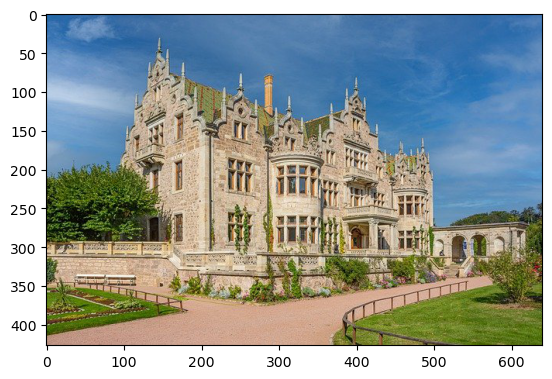

castle(81.0%)


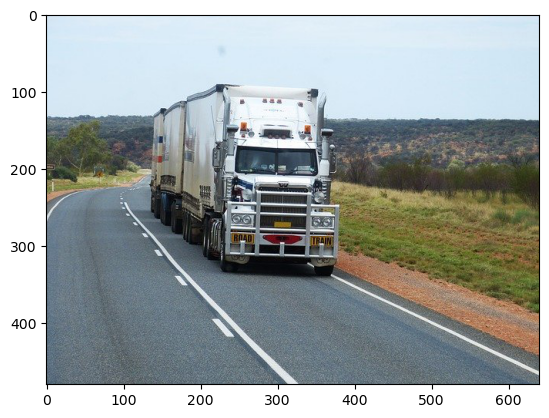

trailer_truck(52.0%)


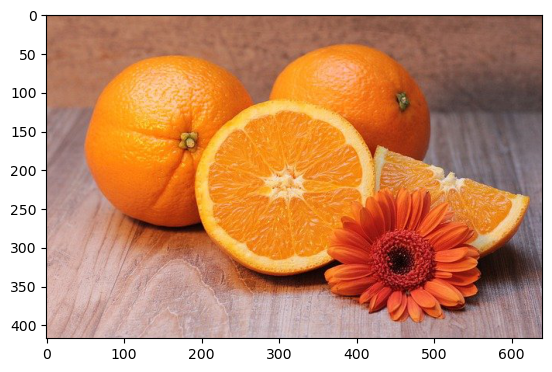

orange(97.5%)


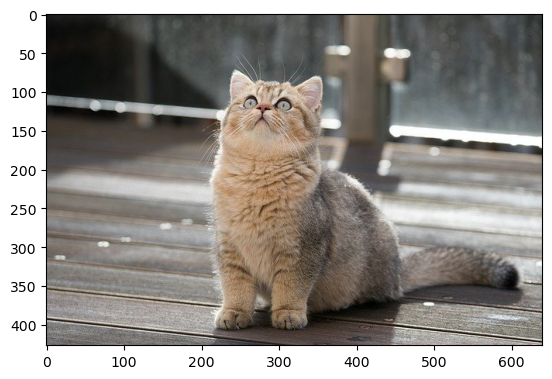

tiger_cat(35.6%)


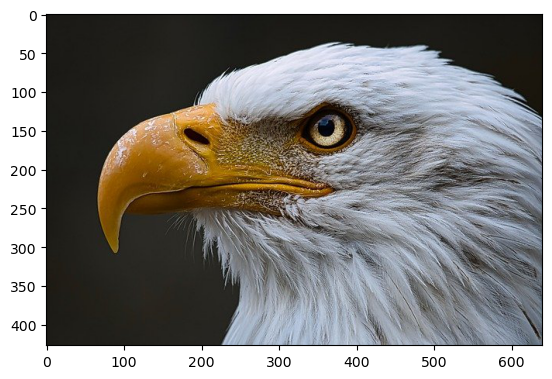

bald_eagle(69.1%)


In [7]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()
    
    for k in range(topK):
        print(f'{y_pred_top[i][k][1]}({round(y_pred_top[i][k][2]*100,1)}%)')